In [31]:

from pysofaconventions import *
import numpy as np
def printLine():
    print("-----------------------------------------------------------------------\n")

def printBlankLine():
    print("")


In [33]:
from matplotlib import pyplot as plt
import numpy as np
aaapath = '/workspace/fourth_year_project/HRTF Models/sofa_hrtfs/RIEC_hrir_subject_001.sofa'
aaasofa = SOFAFile(aaapath, 'r')

sampling_rate = aaasofa.getSamplingRate()

print(f'Sampling rate: {sampling_rate} Hz')

# aaasourcePositions = aaasofa.getVariableValue('SourcePosition')

# print("\n")
# print("Source Positions")
# print(sourcePositions)
# and the info (units, coordinates)
# print(sofa.getPositionVariableInfo('SourcePosition'))

# Let's inspect the first measurement
# m = 0
# print("\n")
# print("Source Position of measurement " + str(m))
# print(sourcePositions[m])
# which is at 82 degrees azimuth, -7 degrees elevation

# Read the data
# aaadata = aaasofa.getDataIR()
# and get the HRTF associated with m=0

# angle, elevation, distance
# hrtf = data[m,:,:]
# aaadata.shape


Sampling rate: [48000.] Hz


In [6]:
aaasourcePositions[:, 0]

masked_array(data=[  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,
                    45.,  50.,  55.,  60.,  65.,  70.,  75.,  80.,  85.,
                    90.,  95., 100., 105., 110., 115., 120., 125., 130.,
                   135., 140., 145., 150., 155., 160., 165., 170., 175.,
                   180., 185., 190., 195., 200., 205., 210., 215., 220.,
                   225., 230., 235., 240., 245., 250., 255., 260., 265.,
                   270., 275., 280., 285., 290., 295., 300., 305., 310.,
                   315., 320., 325., 330., 335., 340., 345., 350., 355.,
                     0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,
                    45.,  50.,  55.,  60.,  65.,  70.,  75.,  80.,  85.,
                    90.,  95., 100., 105., 110., 115., 120., 125., 130.,
                   135., 140., 145., 150., 155., 160., 165., 170., 175.,
                   180., 185., 190., 195., 200., 205., 210., 215., 220.,
                   225., 230., 235., 240., 245., 25

In [7]:
# Get indexes of the source positions when the elevation is 0
i = np.where(sourcePositions[:,1] == 0)[0]
print(i)
angles=  sourcePositions[i, 0]
print(angles)

[216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251
 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269
 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287]
[  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  65.
  70.  75.  80.  85.  90.  95. 100. 105. 110. 115. 120. 125. 130. 135.
 140. 145. 150. 155. 160. 165. 170. 175. 180. 185. 190. 195. 200. 205.
 210. 215. 220. 225. 230. 235. 240. 245. 250. 255. 260. 265. 270. 275.
 280. 285. 290. 295. 300. 305. 310. 315. 320. 325. 330. 335. 340. 345.
 350. 355.]


In [37]:
# Get all hrirs in data at i
hrirs = data[i,:,:]
hrirs.shape

(72, 2, 512)

In [40]:
# Get indexes where elevatio is 0 and azimuth is 0
ii = np.where(sourcePositions[:,0] == 0)[0]
# Get overlap between i and ii
iii = np.intersect1d(i, ii)
ii,iii

(array([  0,  72, 144, 216, 288, 360, 432, 504, 576, 648, 720, 792, 864],
       dtype=int64),
 array([216], dtype=int64))

In [1]:
import sys
sys.path.append('/workspace/fourth_year_project/HRTF Models/')

from HRIRDataset import HRIRDataset
from MainModel import MainModel
import matplotlib.pyplot as plt

In [2]:
sofa_file = '/workspace/fourth_year_project/HRTF Models/sofa_hrtfs/RIEC_hrir_subject_001.sofa'
hrir_dataset = HRIRDataset()
for i in range(1,100):
    hrir_dataset.load(sofa_file.replace('001', str(i).zfill(3)))



In [3]:
len(hrir_dataset)

7128

In [13]:
from torch.utils.data import DataLoader
import torch
model = MainModel()
# Set the model to training mode
model.train()
num_epochs = 100

# Create the DataLoader
#dataloader = DataLoader(hrir_dataset, batch_size=32, shuffle=True)
device = torch.device('cuda')
model = model.to(device)

# Split the dataset into a training, validation and test set
# 0.8, 0.1, 0.1 respectively
train_size = int(0.7 * len(hrir_dataset))
val_size = int(0.2 * len(hrir_dataset))
test_size = len(hrir_dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(hrir_dataset, [train_size, val_size, test_size])



/workspace/venv_work/lib/python3.8/site-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [14]:
# model.load_state_dict(torch.load('/workspace/fourth_year_project/HRTF Models/WorkingModelWeights.pth'))
model.load_state_dict(torch.load('/workspace/model_26_before_it_fucks_up.pth')['model_state_dict'])

<All keys matched successfully>

In [15]:
batch_size = 32

dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=6)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True, num_workers=6)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True, num_workers=6)

In [16]:
import torch
from torch import optim, nn
from torch.optim.lr_scheduler import StepLR

# learning_rate = 0.01
# Define the optimizer and loss function
# optimizer = optim.Adam(model.parameters(), lr=learning_rate)
optimizer = optim.Adam(model.parameters())
loss_function = nn.MSELoss()
scheduler = StepLR(optimizer, step_size=30, gamma=0.1)

# Set the model to training mode
model.train()

# myshape = (32, 2, 512)
# Create a weight tensor that has higher values for the early part of the impulse response
# weights = torch.ones(myshape)
# weights[:, :200] *= 2  # Increase the weight for the first 200 samples
# # move to cuda
# weights = weights.to(device)

# Loop over each epoch
for epoch in range(num_epochs):
    # Initialize the epoch loss
    epoch_loss = 0.0

    # Loop over each batch
    for i, batch in enumerate(dataloader):
        # Get the src and tgt sequences from the batch
        #print(batch)
        src, tgt, angle = batch


        # Move data to the same device as the model
        src = src.to(device)
        tgt = tgt.to(device)
        angle = angle.to(device)
        # print(src.shape, tgt.shape, angle.shape)
        # convert to floats
        angle = angle.float()
        src = src.float()
        tgt = tgt.float()

        # Zero the gradients
        optimizer.zero_grad()

        # src = (src - src.mean()) / src.std()
        # tgt = (tgt - tgt.mean()) / tgt.std()

        # print(src.mean(), src.std(), tgt.mean(), tgt.std())
        # print(tgt)
        # break

        # Forward pass through the model
        output = model(src, angle, tgt)
        
        # remove the last feature dimension from output
        # [batch_size, d_model, seq_length] --> [batch_size, d_model-1, seq_length]
        output = output[:, :-1, :]
        #print(output.shape, tgt.shape)
        # Compute the loss
        #print("Before loss training: ", output.shape, tgt.shape)
        loss = loss_function(output, tgt)
        # Multiply the loss by the weights
        # loss = loss * weights
        # mse = (output - tgt) ** 2

        # # Calculate the weighted loss
        # weights = torch.ones(tgt.shape)
        # weights[:, :, :300] *= 10
        # weights = weights.to(device)
        
        # loss = (mse * weights).mean()
        

        # Backward pass
        loss.backward()

        # Update the weights
        optimizer.step()

        # Accumulate the batch loss
        epoch_loss += loss.item()
    val_loss = 0
    scheduler.step()
    # Validate the model
    model.eval()
    with torch.no_grad():
        for i, batch in enumerate(val_loader):
            src, tgt, angle = batch
            src = src.to(device)
            tgt = tgt.to(device)
            angle = angle.to(device)
            angle = angle.float()
            src = src.float()
            tgt = tgt.float()
            # src = (src - src.mean()) / src.std()
            # tgt = (tgt - tgt.mean()) / tgt.std()


            output = model(src, angle, tgt)
            # remove the last feature dimension from output
            output = output[:, :-1, :]
            #print("Before loss val: ",output.shape, tgt.shape)
            loss = loss_function(output, tgt)
            val_loss += loss.item()
    # Print the average loss for this epoch
    print(f'Epoch {epoch + 1} | Training Loss: {epoch_loss / len(train_dataset)} | Validation Loss: {val_loss / len(val_dataset)} | Learning Rate: {scheduler.get_last_lr()}')
    if epoch % 2 == 0:
        torch.save(model.state_dict(), f'/workspace/fourth_year_project/HRTF Models/model_{epoch}_step_scheded.pth')

Epoch 1 | Training Loss: 0.0002764457642884974 | Validation Loss: 0.00011712873321876192 | Learning Rate: [0.001]
Epoch 2 | Training Loss: 0.00011309190090625469 | Validation Loss: 0.00011465912897205144 | Learning Rate: [0.001]
Epoch 3 | Training Loss: 0.00011222657426858706 | Validation Loss: 0.0001142969982404458 | Learning Rate: [0.001]
Epoch 4 | Training Loss: 0.00011133743776913862 | Validation Loss: 0.00011250013795991739 | Learning Rate: [0.001]
Epoch 5 | Training Loss: 9.724573132548968e-05 | Validation Loss: 6.227160877499141e-05 | Learning Rate: [0.001]
Epoch 6 | Training Loss: 5.3021981587902675e-05 | Validation Loss: 3.8652800374844094e-05 | Learning Rate: [0.001]
Epoch 7 | Training Loss: 3.768209552145579e-05 | Validation Loss: 3.795902073187263e-05 | Learning Rate: [0.001]
Epoch 8 | Training Loss: 3.720685689799498e-05 | Validation Loss: 3.753273506861246e-05 | Learning Rate: [0.001]
Epoch 9 | Training Loss: 3.693974032032228e-05 | Validation Loss: 3.722275407135225e-05 

In [8]:
torch.save(model.state_dict(), '/workspace/fourth_year_project/HRTF Models/model_weights3.pth')

In [11]:
# load in 1 sample from test set
sample = next(iter(test_loader))
src, tgt, angle = sample
src = src.to(device)
tgt = tgt.to(device)
angle = angle.to(device)
angle = angle.float()
src = src.float()
tgt = tgt.float()

# Get first sample from batch
src = src[0]
tgt = tgt[0]
angle = angle[0]


# output = model(src, angle)

In [12]:
# src_norm = (src - src.mean()) / src.std()
# tgt_norm = (tgt - tgt.mean()) / tgt.std()

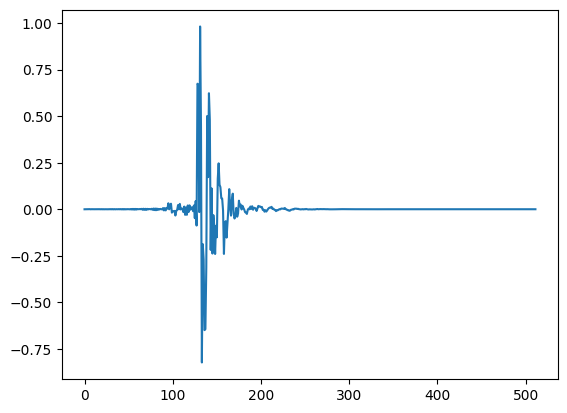

In [13]:
# plot src
# plt.figure()
plt.plot(src[0].cpu().detach().numpy())

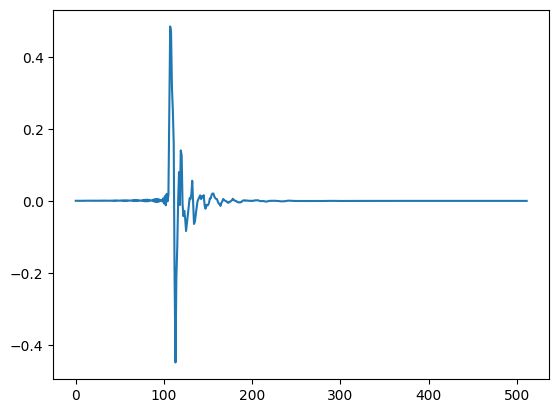

In [15]:
plt.plot(tgt[0].cpu().detach().numpy())

In [17]:
print(src.shape, angle.shape, tgt.shape)
print(angle)

output = model(src.unsqueeze(0), angle.unsqueeze(0), tgt.unsqueeze(0))

torch.Size([2, 512]) torch.Size([]) torch.Size([2, 512])
tensor(170., device='cuda:0')


In [18]:
output  = output.squeeze(0)
output.shape

torch.Size([3, 512])

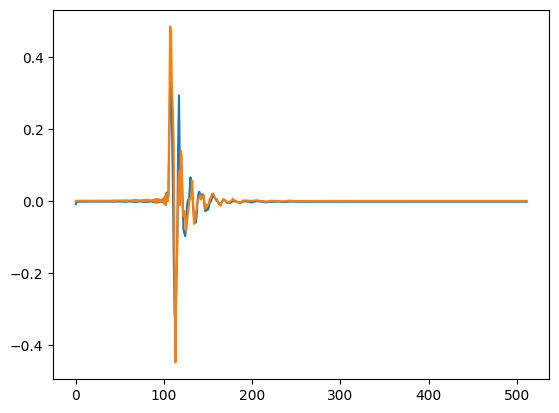

In [47]:
plt.plot(output[0].cpu().detach().numpy())
# plt.plot(tgt[0].cpu().detach().numpy())

In [24]:
output[1]

tensor([ 7.6241e-03,  2.3933e-03,  2.2736e-03,  2.4731e-03,  2.3239e-03,
         2.2536e-03,  2.4524e-03,  2.2028e-03,  2.5397e-03,  2.1544e-03,
         2.5049e-03,  2.3140e-03,  2.3168e-03,  2.3491e-03,  2.1247e-03,
         2.3283e-03,  2.0922e-03,  2.2275e-03,  2.1411e-03,  2.2610e-03,
         2.0851e-03,  2.4350e-03,  2.0758e-03,  2.4908e-03,  2.1555e-03,
         2.3449e-03,  2.3062e-03,  2.1160e-03,  2.4694e-03,  1.9268e-03,
         2.4999e-03,  1.9516e-03,  2.4352e-03,  1.9945e-03,  2.3231e-03,
         2.0635e-03,  2.3248e-03,  2.1259e-03,  2.2048e-03,  2.2412e-03,
         2.0264e-03,  2.4333e-03,  1.7914e-03,  2.7099e-03,  1.6783e-03,
         2.6907e-03,  1.7088e-03,  2.5253e-03,  1.9533e-03,  2.1474e-03,
         2.2193e-03,  1.7755e-03,  2.5208e-03,  1.6316e-03,  2.8012e-03,
         1.4397e-03,  2.7592e-03,  1.4978e-03,  2.6697e-03,  1.5764e-03,
         2.3753e-03,  1.8712e-03,  1.8820e-03,  2.3521e-03,  1.3928e-03,
         2.8334e-03,  1.0312e-03,  3.0797e-03,  9.1

In [29]:
a = output[:-1,:]
a.shape

torch.Size([2, 512])

In [37]:
import numpy as np
from scipy.io.wavfile import write
import torch
# Convert the tensor to a numpy array
data = a.cpu().detach().numpy()

# Transpose the data to get it in the correct shape
data = np.transpose(data)
data = (data * 32767).astype(np.int16)

# Write the data to a .wav file
write('/workspace/fourth_year_project/HRTF Models/hrir.wav', 48000, data)

In [39]:
import numpy as np
from scipy.io import wavfile
from scipy.signal import fftconvolve

# Load the HRIR and audio file
hrir_rate, hrir_data = wavfile.read('/workspace/fourth_year_project/HRTF Models/hrir.wav')
audio_rate, audio_data = wavfile.read('/workspace/fourth_year_project/HRTF Models/baby.wav')


In [52]:
audio_data.shape

(11003904, 2)

In [40]:
hrir_data

array([[-290,  249],
       [ -66,   78],
       [ -61,   74],
       ...,
       [ -71,   82],
       [ -71,   82],
       [ -71,   82]], dtype=int16)

In [42]:
from scipy.signal import resample_poly

# Assume hrir_data is your HRIR data and hrir_rate is its sample rate
# Assume audio_rate is the sample rate of your audio

# Calculate the greatest common divisor of the two rates
gcd = np.gcd(hrir_rate, audio_rate)

# Resample the HRIR data
hrir_data_resampled = resample_poly(hrir_data, audio_rate // gcd, hrir_rate // gcd)

In [44]:
len(hrir_data_resampled), len(hrir_data)

(471, 512)

In [45]:
# Perform the convolution
output_data = fftconvolve(audio_data, hrir_data, mode='full')

# Make sure to scale the output to avoid clipping
output_data /= np.abs(output_data).max()

# Save the output
wavfile.write('/workspace/fourth_year_project/HRTF Models/output.wav', audio_rate, output_data.astype(np.int16))

In [46]:
output_data

array([[ 7.11947684e-17, -3.79574990e-17, -2.72522582e-18],
       [ 1.01706812e-16, -5.32135208e-17, -1.79812476e-17],
       [ 6.10240872e-17, -1.52560218e-17, -1.52560218e-17],
       ...,
       [ 3.30622529e-06,  1.97941596e-06, -6.69613540e-06],
       [ 1.82081973e-06,  1.68246982e-06, -4.37185700e-06],
       [ 6.70828320e-07,  8.54395023e-07, -1.88155871e-06]])

In [124]:
hsample = next(iter(test_loader))
hsrc, htgt, hangle = hsample

In [125]:
htgt = htgt[0]

In [126]:
htgt.shape

torch.Size([2, 512])

In [127]:
from scipy.signal import resample_poly

# Assume hrir_data is your HRIR data and hrir_rate is its sample rate
# Assume audio_rate is the sample rate of your audio

# Calculate the greatest common divisor of the two rates
print(htgt.shape)
# htgt = htgt.numpy()
gcd = np.gcd(48000, 44100)

# Resample the HRIR data
htgt = resample_poly(htgt, 44100 // gcd, 48000 // gcd)
htgt.shape

torch.Size([2, 512])


(2, 512)

In [128]:
htgt = np.transpose(htgt)
# htgt = (htgt * 32767).astype(np.int16)
htgt.shape

(512, 2)

In [129]:
output = np.stack([fftconvolve(audio_data[:, i], htgt[:, i], mode='full') for i in range(2)], axis=-1)

# Make sure to scale the output to avoid clipping
output /= np.abs(output).max()

# Save the output
wavfile.write('/workspace/fourth_year_project/HRTF Models/output.wav', audio_rate, output_data.astype(np.int16))

In [113]:
htgt.shape, audio_data.shape, output_data.shape

((512, 2), (11003904, 2), (11004415, 3))

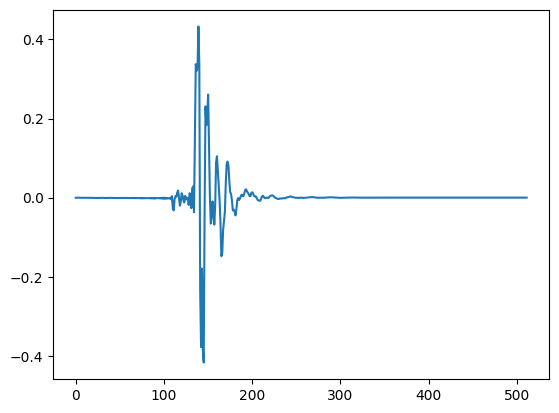

In [123]:
hsample = next(iter(test_loader))
hsrc, htgt, hangle = hsample
plt.plot(htgt[3, 1,:])

In [17]:
model.load_state_dict(torch.load('/workspace/fourth_year_project/HRTF Models/model_98_step_scheded.pth'))

<All keys matched successfully>

In [18]:
# load in 1 sample from test set
sample = next(iter(test_loader))
src, tgt, angle = sample
src = src.to(device)
tgt = tgt.to(device)
angle = angle.to(device)
angle = angle.float()
src = src.float()
tgt = tgt.float()

# Get first sample from batch
src = src[0]
tgt = tgt[0]
angle = angle[0]


# output = model(src, angle)
# src_norm = (src - src.mean()) / src.std()
# tgt_norm = (tgt - tgt.mean()) / tgt.std()
# plot src
# plt.figure()


# plt.plot(output[0].cpu().detach().numpy())
# plt.plot(tgt[0].cpu().detach().numpy())

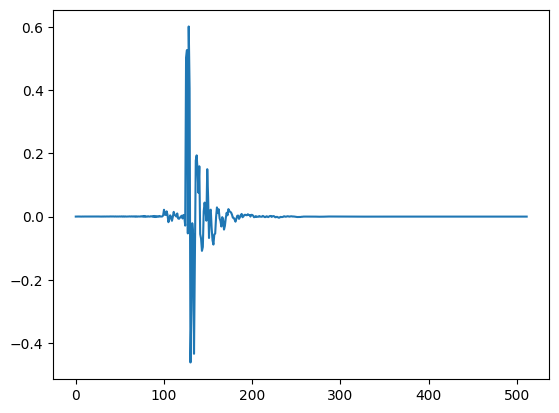

In [22]:
plt.plot(src[0].cpu().detach().numpy())


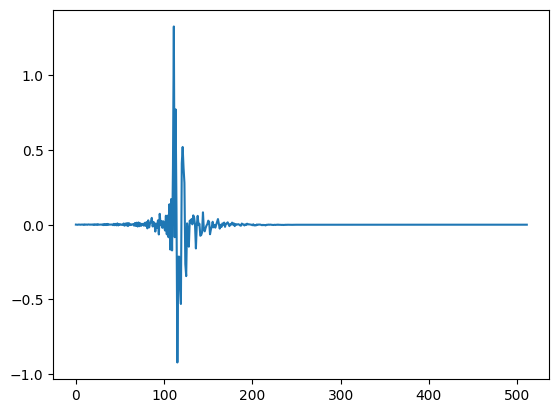

In [23]:
plt.plot(tgt[0].cpu().detach().numpy())

In [24]:
print(src.shape, angle.shape, tgt.shape)
print(angle)

output = model(src.unsqueeze(0), angle.unsqueeze(0), tgt.unsqueeze(0))
output  = output.squeeze(0)
output.shape

torch.Size([2, 512]) torch.Size([]) torch.Size([2, 512])
tensor(55., device='cuda:0')


torch.Size([3, 512])

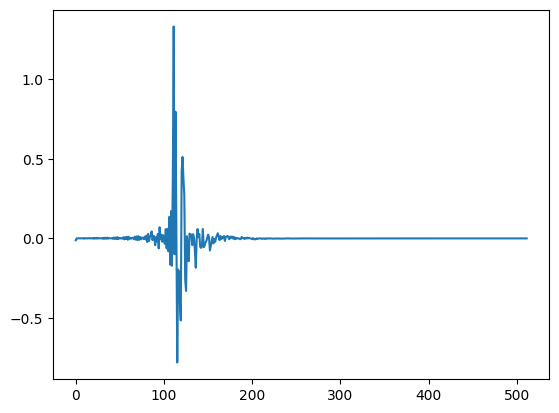

In [25]:
plt.plot(output[0].cpu().detach().numpy())